In [13]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import explore
import prepare
import zillow_wrangle

In [14]:
zillow_df = acquire.zillow_data_all()

In [15]:
zillow_df = zillow_wrangle.prepare_zillow(zillow_df)

In [16]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50185 entries, 0 to 77573
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            50185 non-null  int64  
 1   parcelid                      50185 non-null  int64  
 2   bathroomcnt                   50185 non-null  float64
 3   bedroomcnt                    50185 non-null  float64
 4   calculatedbathnbr             50185 non-null  float64
 5   calculatedfinishedsquarefeet  50185 non-null  float64
 6   finishedsquarefeet12          50185 non-null  float64
 7   fips                          50185 non-null  float64
 8   fullbathcnt                   50185 non-null  float64
 9   latitude                      50185 non-null  float64
 10  longitude                     50185 non-null  float64
 11  lotsizesquarefeet             50185 non-null  float64
 12  propertycountylandusecode     50185 non-null  object 
 13  p

In [17]:
col = ['bathroomcnt', 'bedroomcnt','fips','latitude', 'calculatedbathnbr','calculatedfinishedsquarefeet', 'lotsizesquarefeet','propertylandusetypeid','roomcnt', 'yearbuilt','taxvaluedollarcnt','taxamount','logerror', 'transactiondate']

In [18]:
zillow_df = zillow_df[col]

In [19]:
zillow_df.describe()

,bathroomcnt,bedroomcnt,fips,latitude,calculatedbathnbr,calculatedfinishedsquarefeet,lotsizesquarefeet,propertylandusetypeid,propertylandusetypeid,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,"50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00","50,185.00"
mean,2.18,3.24,"6,049.03","34,026,425.48",2.19,"1,779.80","10,588.11",261.02,261.02,1.90,"1,962.41","453,269.78","5,567.85",0.02
std,0.83,0.89,21.05,"273,936.92",0.83,698.73,"86,912.98",0.46,0.46,3.11,22.54,"451,662.70","5,209.07",0.17
min,0.00,0.00,"6,037.00","33,340,620.00",1.00,128.00,236.00,261.00,261.00,0.00,"1,878.00","1,000.00",49.18,-4.66
25%,2.00,3.00,"6,037.00","33,830,350.00",2.00,"1,252.00","5,509.00",261.00,261.00,0.00,"1,950.00","185,085.00","2,563.41",-0.02
50%,2.00,3.00,"6,037.00","34,022,742.00",2.00,"1,620.00","6,749.00",261.00,261.00,0.00,"1,960.00","357,143.00","4,467.22",0.01
75%,3.00,4.00,"6,059.00","34,190,471.00",3.00,"2,187.00","8,400.00",261.00,261.00,5.00,"1,977.00","576,316.00","6,895.16",0.04
max,7.50,9.00,"6,111.00","34,818,767.00",7.50,"3,857.00","6,971,010.00",275.00,275.00,13.00,"2,016.00","15,618,488.00","177,740.85",3.39


### 1.) Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

1.) Is there a relationship between log error and calculatedfinishedsquareft? pearson correaltion

2.) Is there a relationship between log error and lotsizesquarefeet? pearson correlation

3.) There is no difference in the logerror for those who have calculatedfinishedsquarefeet <= 1650 ft compared to those who have > 1650ft. TTest- two sample

4.) There is no difference in logerror for houses built before  or on 1962 and those built after 1962. TTest two sample

5.) Is there a relationship between log error and lotsizesquarefeet?


In [20]:
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,"50,185.00",2.18,0.83,0.00,2.00,2.00,3.00,7.50
bedroomcnt,"50,185.00",3.24,0.89,0.00,3.00,3.00,4.00,9.00
fips,"50,185.00","6,049.03",21.05,"6,037.00","6,037.00","6,037.00","6,059.00","6,111.00"
latitude,"50,185.00","34,026,425.48","273,936.92","33,340,620.00","33,830,350.00","34,022,742.00","34,190,471.00","34,818,767.00"
calculatedbathnbr,"50,185.00",2.19,0.83,1.00,2.00,2.00,3.00,7.50
calculatedfinishedsquarefeet,"50,185.00","1,779.80",698.73,128.00,"1,252.00","1,620.00","2,187.00","3,857.00"
lotsizesquarefeet,"50,185.00","10,588.11","86,912.98",236.00,"5,509.00","6,749.00","8,400.00","6,971,010.00"
propertylandusetypeid,"50,185.00",261.02,0.46,261.00,261.00,261.00,261.00,275.00
propertylandusetypeid,"50,185.00",261.02,0.46,261.00,261.00,261.00,261.00,275.00
roomcnt,"50,185.00",1.90,3.11,0.00,0.00,0.00,5.00,13.00


In [21]:
#logerror is continous target!

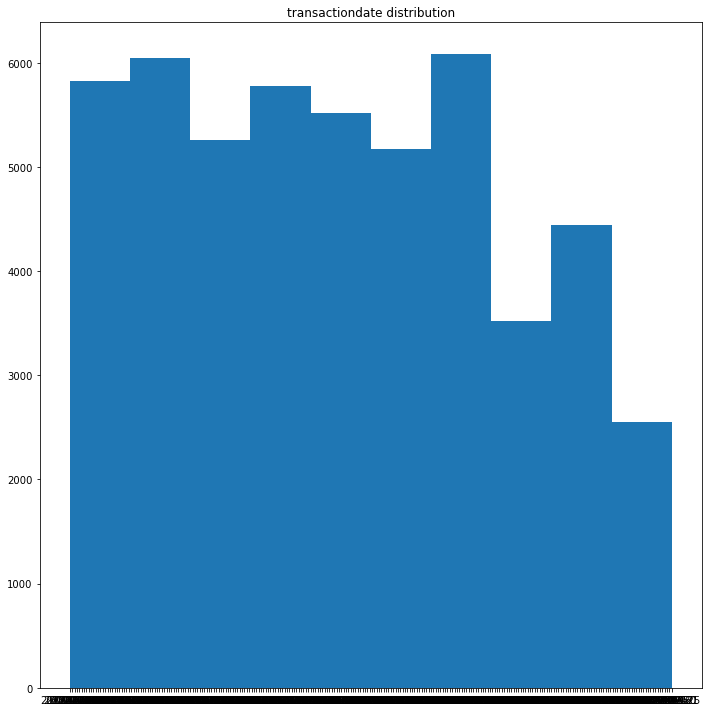

In [22]:
object_vars = zillow_df.select_dtypes(include=['object'])
quant_vars = zillow_df.select_dtypes(exclude=['object'])


plt.figure(figsize=(10,10))
for col in object_vars:
    plt.hist(zillow_df[col])
    plt.title(f"{col} distribution")
    plt.tight_layout()
    plt.show()

In [23]:
#tranaction_date appears to be normally distributed

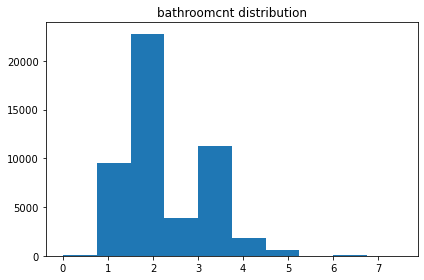

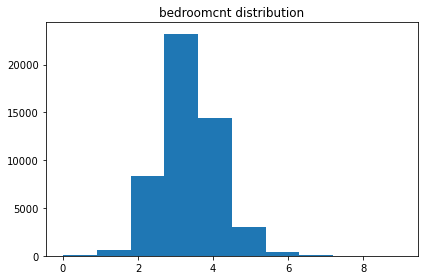

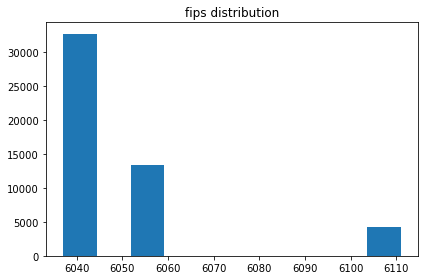

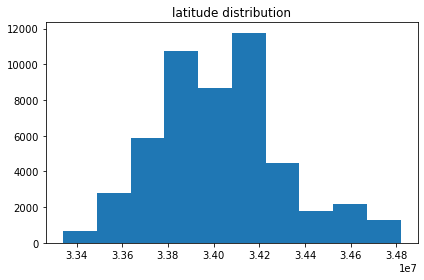

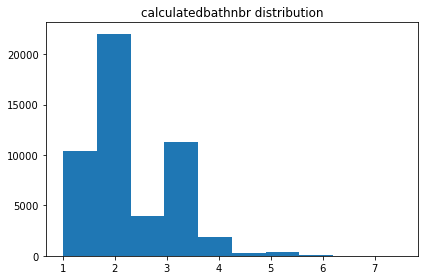

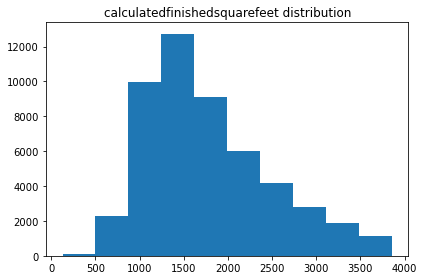

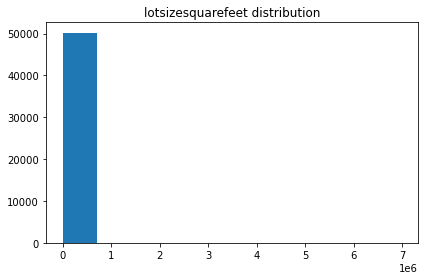

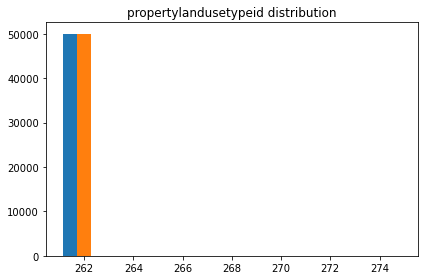

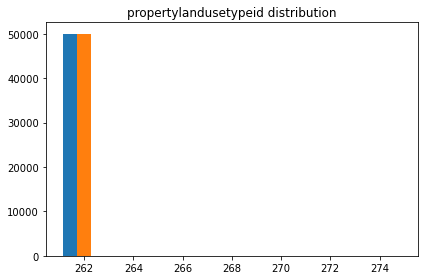

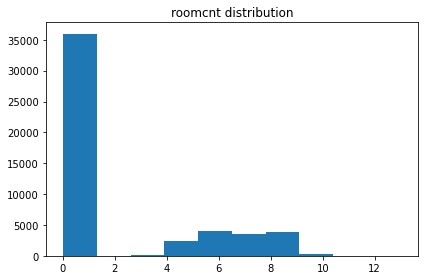

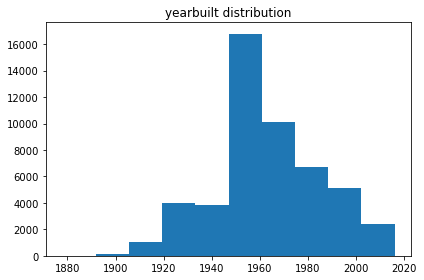

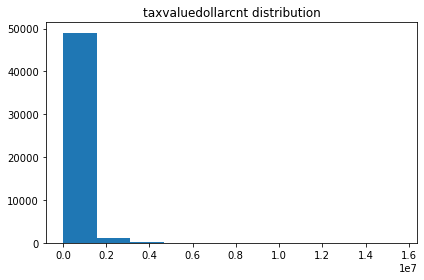

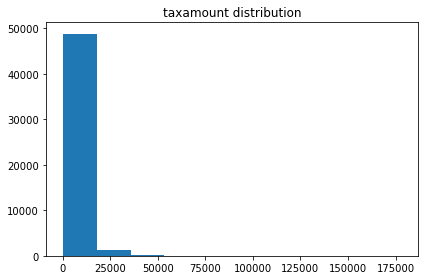

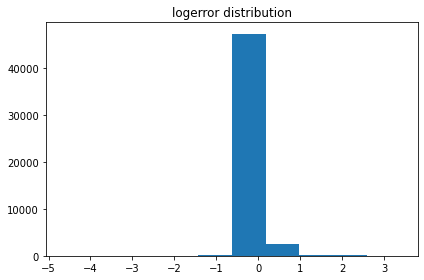

In [24]:
for col in quant_vars:
    plt.hist(zillow_df[col])
    plt.title(f"{col} distribution")
    plt.tight_layout()
    plt.show()

In [25]:
#yearbuilt is normally distributed.
#bedroomcnt is normally distributed.
#bathroomcnt is normally distributed.
#calculatedbathnbr is normally distributed.
#transaction_date is normally distributed.

In [26]:
train, validate, test = prepare.split_continuous(zillow_df)

train -> (28103, 15)
validate -> (12045, 15)
test -> (10037, 15)


### 1.) Need to generate 5 questions:

### 2.)Answer those questions through a mix of statistical tests and visualizations.

In [27]:
alpha = 0.05

1.) there is no relationship between logerror and calculatedfinishedsquarefeet. 
##### appears the spread is range is larger for properties below 2000 ft 

0.023572138959430854 7.750244124036134e-05


Text(8, 80, 'corr = 0.024')

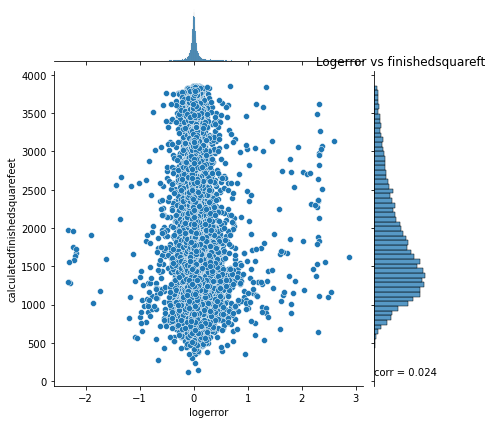

In [28]:
corr, p = stats.pearsonr(train.logerror, train.calculatedfinishedsquarefeet)
print(corr,p)
sns.jointplot(x = 'logerror', y = 'calculatedfinishedsquarefeet',data = train)
plt.title('Logerror vs finishedsquareft')
plt.text(8, 80, f'corr = {corr:.3f}')


In [29]:
null = 'there is no relationship between logerror and calculatedfinishedsquarefeet'

if p < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypotheis,  there is no relationship between logerror and calculatedfinishedsquarefeet


----------------------

2.) there is no relationship between logerror and lotsizesquareft.

0.01136923135278061 0.056662012085937845


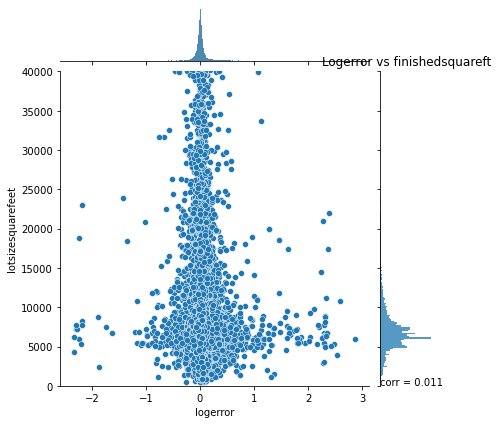

In [56]:
corr, p = stats.pearsonr(train.logerror, train.lotsizesquarefeet)
print(corr,p)
sns.jointplot(x = 'logerror', y = 'lotsizesquarefeet',data = train)
plt.title('Logerror vs finishedsquareft')
plt.ylim(0,40000)
plt.text(8, 80, f'corr = {corr:.3f}')
plt.show()

In [37]:
null = 'there is no relationship between logerror and lotsizesquareft'

if p < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we do not reject the null hypothesis, there is no relationship between logerror and lotsizesquareft


------------------

3.) there is no relationship between latitude and logerror

-0.016172819358448737 0.0067028051936842414


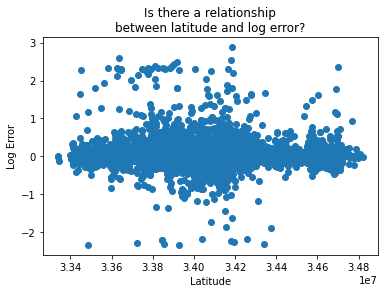

In [49]:
# plot age by spending_score
corr, p = stats.pearsonr(train.logerror, train.latitude)
print(corr,p)
plt.scatter(train.latitude, train.logerror)
plt.xlabel("Latitude")
plt.ylabel("Log Error")
plt.title("Is there a relationship\nbetween latitude and log error?")
plt.show()

In [51]:
null = 'there is no relationship between latitude and logerror'

if p < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypotheis,  there is no relationship between latitude and logerror


----------------

4.) If we control the year built, does the log error score differ across latitudes.

In [44]:
train['year_built_bin'] = pd.cut(train.yearbuilt, [0,1962, 2005)

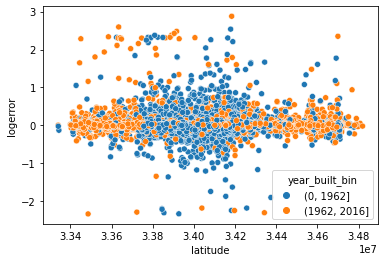

In [48]:
sns.scatterplot(train.latitude, train.logerror, hue = train.year_built_bin)
plt.show()

-------------------

- 5.) Does logerror score vary across fips?
 - continous (logerror) and fips (categorical)
 - two sample, two tailed t-tests

In [52]:
# test the assumption of equal variance
stats.levene(train[train.fips <= 6037].logerror, 
             train[train.fips > 6037].logerror
            )

LeveneResult(statistic=36.95380535792843, pvalue=1.225181741297543e-09)

In [53]:
#Mannwhiteneyu test (a type of t-test)

group1 = train[train.fips <= 6037]['logerror']
group2 = train[train.fips > 6037]['logerror']

stats.mannwhitneyu(group1, group2)

MannwhitneyuResult(statistic=86447550.0, pvalue=8.40167022363121e-08)

In [55]:
null = 'Is there a difference in log error for different counties'

if p < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we reject the null hypotheis,  Is there a difference in log error for different counties


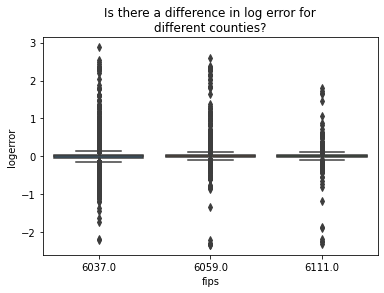

In [54]:
sns.boxplot(train.fips, train.logerror)
plt.title("Is there a difference in log error for\ndifferent counties?")
plt.show()